<span style="font-size: 280%;color:#1155cc"> Pytorch_3_Proste sieci neuronowe_Regresja liniowa
    
<span style="font-size: 150%;color:Red"> 16.09.2020

In [1]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import imageio

<span style="font-size: 150%;color:#1155cc"> Krok 1. Tworzenie zbioru danych 

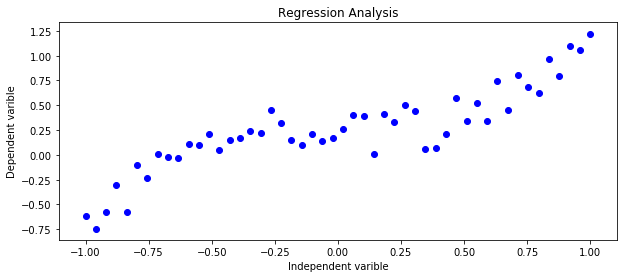

In [2]:
torch.manual_seed(1)    # reproducible

x = torch.unsqueeze(torch.linspace(-1, 1, 50), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(3) + 0.5*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)

# torch can only train on Variable, so convert them to Variable
x, y = Variable(x), Variable(y)

# view data
plt.figure(figsize=(10,4))
plt.scatter(x.data.numpy(), y.data.numpy(), color = "blue")
plt.title('Regression Analysis')
plt.xlabel('Independent varible')
plt.ylabel('Dependent varible')
plt.show()

<span style="font-size: 150%;color:#1155cc"> Krok 2. Definiowanie sieci neuronowej
    
<span style="font-size: 100%;color:#1155cc"> 2.1 Programowanie torch.nn.Module

In [3]:

class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

<span style="font-size: 100%;color:#1155cc"> 2.2 Definicja krztałtu sieci

In [4]:
net = Net(n_feature=1, n_hidden=8, n_output=1)     # DEFINICJA SIECI NEURONOWEJ
net

Net(
  (hidden): Linear(in_features=1, out_features=8, bias=True)
  (predict): Linear(in_features=8, out_features=1, bias=True)
)

<span style="font-size: 100%;color:#1155cc"> 2.2 Algorytm optymalizacji: Stochastyczny spadek gradientu (SGD)
    
lr: Szybkość uczenia się -> Szybkość, z jaką nasz model aktualizuje wagi w komórkach za każdym razem, gdy przeprowadzana jest wsteczna propagacja

In [5]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.1)

Optymalizator ADAM zamiast użytego optymalizatora SGD, działa gorzej dla wybranego zbioru danych empirycznych. Należy przetestować różne rodzaje optymalizatorów.

In [6]:
#optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

<span style="font-size: 100%;color:#1155cc"> 2.2 Definicja funkcji straty
to jest R2 dla regresji

In [7]:
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

<span style="font-size: 150%;color:#1155cc"> Krok 3. Definiowanie procesu nauki i nauka

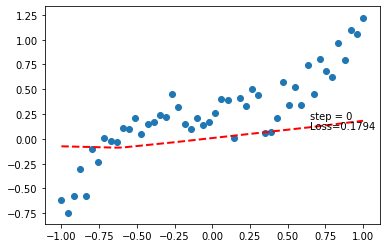

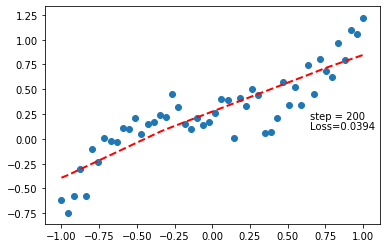

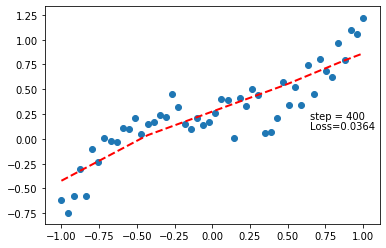

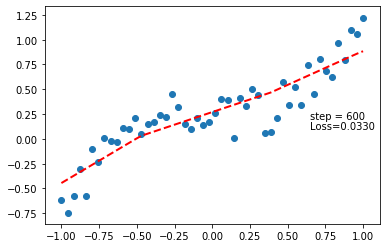

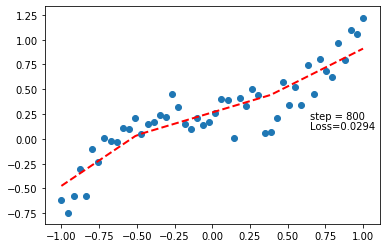

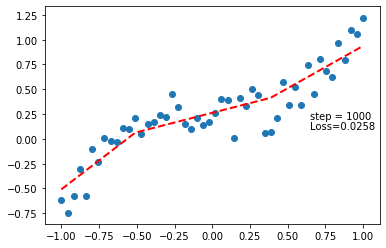

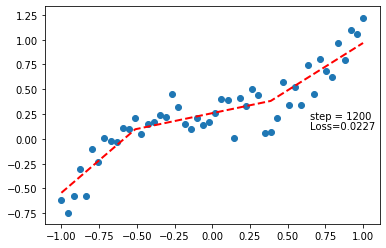

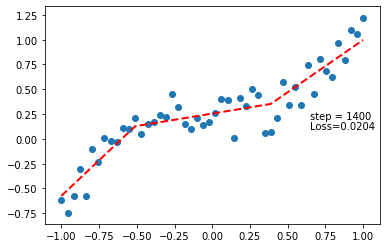

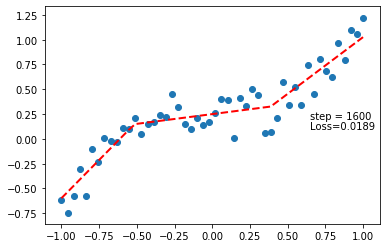

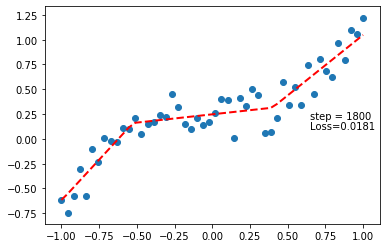

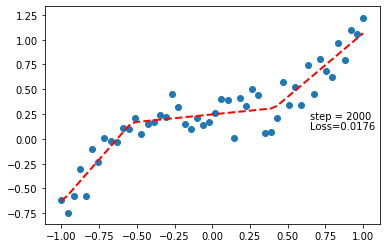

In [8]:
inputs = Variable(x)                          #1. deklarujemy x i y do nauki
outputs = Variable(y)
for i in range(2050):                          #2. pętla 1050 powtórzeń
   prediction = net(inputs)
   loss = loss_func(prediction, outputs) 
   optimizer.zero_grad()
   loss.backward()        
   optimizer.step()       

   if i % 200 == 0:                             #3. Pokazuje naukę co 100 kroków
       # plot and show learning process
       plt.cla()
       plt.scatter(x.data.numpy(), y.data.numpy())
       plt.plot(x.data.numpy(), prediction.data.numpy(), 'r--', lw=2)
       plt.text(0.65, 0.1, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 10, 'color':  'black'})
       plt.text(0.65, 0.2, 'step = %d' % i, fontdict={'size': 10, 'color':  'black'})
       plt.pause(0.1)

plt.show()